# American Sign Language Detection Using CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading data and processing into training and validation data

In [2]:
train_df = pd.read_csv("sign_mnist_train.csv")
valid_df = pd.read_csv("sign_mnist_valid.csv")

In [3]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,15,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,21,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [4]:
y_train = train_df['label']
y_valid = valid_df['label']

In [5]:
del train_df['label']
del valid_df['label']

In [6]:
x_train = train_df.values
x_valid = valid_df.values

In [7]:
#only 24 alphabets because letters j and z require hand movements
alphabet_classes = 24
#Converting our scalar labels to binary categories (categorical encoding our labels)
y_train = keras.utils.to_categorical(y_train, alphabet_classes)
y_valid = keras.utils.to_categorical(y_valid, alphabet_classes)

In [8]:
print(x_train.min())

0


In [9]:
print(x_train.max())

255


In [10]:
#Normalize our data
x_train = x_train / 255
x_valid = x_valid / 255

In [11]:
x_train.shape

(27455, 784)

In [12]:
x_valid.shape

(7172, 784)

In [13]:
#reshaping the image data for our CNN model
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

## Dictionary for storing the alphabets and their indices

In [14]:
alphabets = "abcdefghiklmnopqrstuvwxy"

In [15]:
dictionary = {}

In [16]:
for i in range(len(alphabets)):
    dictionary[i] = alphabets[i]

In [17]:
dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y'}

## Creating Our Model

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2), strides = 2, padding = "same"),
    tf.keras.layers.Conv2D(50, (3, 3), strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2), strides = 2, padding = "same"),
    tf.keras.layers.Conv2D(25, (3, 3), strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2), strides = 2, padding = "same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512, activation = "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = alphabet_classes, activation = "softmax")
])

## Data Augmentation

In [20]:
datagen = ImageDataGenerator(
        rotation_range = 10,
        height_shift_range = 0.1,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False,
        fill_mode = 'nearest',
)

In [21]:
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size = batch_size)
x, y = img_iter.next()

In [22]:
x.shape

(32, 28, 28, 1)

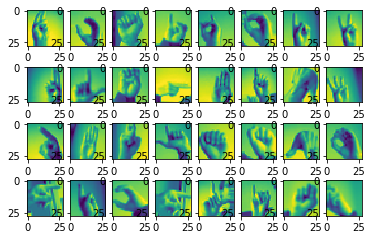

In [23]:
figure, axis = plt.subplots(nrows = 4, ncols = 8)
for i in range(batch_size):
    image = x[i]
    axis.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [24]:
# Fitting our generator on the training dataset
datagen.fit(x_train)

In [25]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
#Training our model
model.fit(img_iter, epochs = 30, steps_per_epoch = len(x_train)/batch_size, validation_data = (x_valid, y_valid))

Epoch 1/30
857/857 [==============================] - 48s 54ms/step - loss: 1.0574 - accuracy: 0.6594 - val_loss: 0.2357 - val_accuracy: 0.9246
Epoch 2/30
857/857 [==============================] - 46s 54ms/step - loss: 0.2984 - accuracy: 0.8995 - val_loss: 0.6764 - val_accuracy: 0.7854
Epoch 3/30
857/857 [==============================] - 47s 54ms/step - loss: 0.1905 - accuracy: 0.9371 - val_loss: 0.8371 - val_accuracy: 0.7441
Epoch 4/30
857/857 [==============================] - 49s 57ms/step - loss: 0.1439 - accuracy: 0.9543 - val_loss: 0.0682 - val_accuracy: 0.9764
Epoch 5/30
857/857 [==============================] - 46s 54ms/step - loss: 0.1166 - accuracy: 0.9625 - val_loss: 0.1533 - val_accuracy: 0.9511
Epoch 6/30
857/857 [==============================] - 50s 58ms/step - loss: 0.1056 - accuracy: 0.9667 - val_loss: 0.5888 - val_accuracy: 0.8511
Epoch 7/30
857/857 [==============================] - 46s 54ms/step - loss: 0.0923 - accuracy: 0.9719 - val_loss: 0.0718 - val_accuracy:

### Saving our model

In [27]:
model.save('american_sign_language_model')

INFO:tensorflow:Assets written to: american_sign_language_model\assets


### Loading our model

In [23]:
# model = keras.models.load_model('american_sign_language_model')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

## Predicting the letters by observing the images

In [33]:
def predicting_the_letter_in_image(image_path):
    image = mpimg.imread(image_path)
    print('Image Shape: ', image.shape)
    plt.imshow(image)
    image = image_utils.load_img(image_path, color_mode = "grayscale", target_size = (28,28))
    image = image_utils.img_to_array(image)
    image = image.reshape(1, 28, 28, 1)
    image = image/ 255
    predicted_index = model.predict(image)
    predicted_letter = dictionary[np.argmax(predicted_index)]
    return predicted_letter

Image Shape:  (186, 188, 4)


'a'

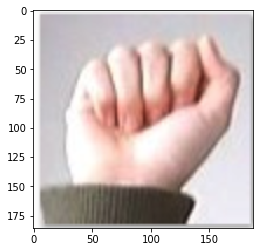

In [34]:
predicting_the_letter_in_image('Images/a.png')

Image Shape:  (184, 186, 4)


'b'

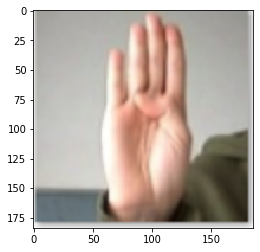

In [35]:
predicting_the_letter_in_image('Images/b.png')

## Lets see if our model can recognise my handsign

Image Shape:  (235, 226, 3)


's'

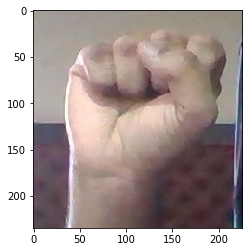

In [45]:
predicting_the_letter_in_image('Images/s.png')